# Traitement du Signal - TP4 : Convolution

---

Aujourd'hui, on va faire des convolutions. Beaucoup de convolutions. On va coder la fonction, puis l'utiliser dans plein de situations.

In [1]:
# A COMPLETER
# Import des librairies
import numpy as np
from matplotlib import pyplot as plt

## Exercice 1 : Pour faire des convolutions, il faut une fonction...

Avant de commencer à effectuer des convolutions, on va tout d'abord coder la fonction. Pour rappel, la fonction de convolution entre un signal *f(t)* et *g(t)* :

\begin{equation*}
f(t) \ast g(t) = \int_{-\infty}^{\infty} f(\tau) g(t - \tau) \, d \tau
\end{equation*}

Evidemment, cette formule fonctionne en analogique, mais on fait du numérique ici, ce qui signifie qu'il faut utiliser la fonction de convolution discrète : 

\begin{equation*}
f[n] \ast g[n]=\sum_{m=-\infty}^{\infty} f[m] \cdot g[n-m] \cdot T_e
\end{equation*}

Ici, $T_e$ est le temps d'échantillonage de $f$ et $g$.

*Attends, ça me dit un truc cette formule... Un mauvais souvenir sûrement...*

Et non, tu ne rêves pas jeune ITI3. Si ça te rappelle quelque chose, c'est qu'elle est très proche d'une autre fonction que nous avons déjà développé : la fonction de corrélation. On va gagner beaucoup de temps !

Récupérez les fonctions utilisées durant le TP2 pour la corrélation, et modifiez-les pour effectuer une convolution à la place.

In [2]:
# A COMPLETER
# Développement de la fonction de convolution

# Les fonctions de padding et de shift restent inchangées par rapport à la corrélation
def padding(signal,M):
    """
    Fonction de padding du signal pour l'agrandir à la taille M (si M supérieur à len(signal))
    signal : tableau 1D NumPy, représentant un signal
    M : entier, représentat la taille de padding attendue pour M
    """
    if M<=len(signal):
        return signal
    out = np.zeros((M),dtype=signal.dtype)
    out[:len(signal)] = signal
    return out

def shift(x, S):
    """
    Effectue un décalage de S sur le signal x
    x : tableau 1D NumPy, représentant un signal
    S : entier, représentant le pas de décalage à effectuer
    """
    len_x = len(x)
    y = np.zeros((len_x+abs(S)))
    if S>0:
        y[-len_x:] = x
        return y[:len_x]
    else:
        y[:len_x] = x
        return y[-len_x:]

# Quatre changements à faire dans la fonction de convolution calculées avec un décalage de n cases :
# - Le décalage temporel ne se fait pas sur f mais sur g
# - Le décalage S à effectuer devient S - (len(g)-1)
# - Le signal g est renversé (g -> g[::-1])
# - On n'utilise pas np.conjugate(g) contrairement à la corrélation

def convolve_at_shift_n(f, g, n, Te):
    """
    Calcule l'échantillon n de la convolution de f et g.
    f,g : tableaux 1D NumPy, signaux à convoluer ensemble
    n : entier, pas de décalage à effectuer
    Te : float, temps d'échantillonnage de f et g
    """

    N, M = len(f), len(g)

    # Décalage équivalent pour faire glisser g renversé contre f :
    S = n - (M - 1)

    # On pad comme dans score_correlate pour garder la même logique d’alignement
    len_f, len_g = len(f), len(g)
    f_pad = padding(f, len_g)
    
    # IMPORTANT: convolution -> pas de conjugaison, mais on renverse g
    g_rev = g[::-1]
    g_pad = padding(g_rev, len_f)
    
    # On décale g de S (positif: droite, négatif: gauche)
    g_decale = shift(g_pad, S)

    # Produit scalaire final
    return np.dot(f_pad, g_decale) * Te

# Un changement à faire par rapport au calcul de la corrélation :
# - L'axe temporel évolue de 0 à (len(f)+len(g)-2)*Te secondes
def convolution(f, g, Te):
    """
    Convolution linéaire de f et g.
    f,g : tableaux 1D NumPy, signaux à convoluer ensemble
    Te : float, temps d'échantillonnage de f et g
    """
    N, M = len(f), len(g)
    # Le retour de la convolution est un signal de taille L = len(f)+len(g)-1
    L = N + M - 1
    n_vals = np.arange(L)
    y = np.array([convolve_at_shift_n(f, g, n, Te) for n in n_vals], dtype=np.result_type(f, g, np.float64))
    # L'axe temporel évolue de 0 à L x Te secondes
    t = n_vals * Te
    return t, y

On va tester notre fonction de convolution ! Pour cela, créez les deux signaux suivants :
- $x(t) = \Pi_{1}(t-t_0)$, avec $t_0 = 2$ 
- $h(t) = e^{-t}$ 

Les deux signaux ont une fréquence d'échantillonnage de $100 Hz$, et évoluent de 0 à 5 secondes.

Créez les deux signaux et tracez les sur une même figure

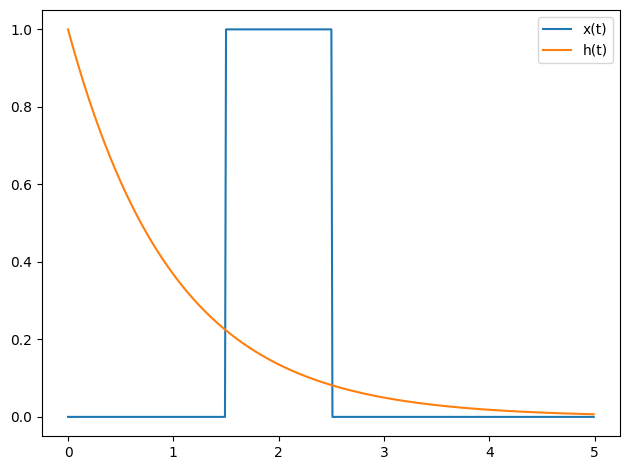

In [3]:
# A COMPLETER
# Création et affichage des deux signaux

# Axe temporel
Fe = 100
Te = 1/Fe
t0 = 2

t = np.arange(0, 5, Te)

# Signaux
x = np.zeros_like(t)
x[np.abs(t-t0)<=0.5] = 1
h = np.exp(-t)                   

# Affichage des signaux
plt.figure()
plt.plot(t,x,label='x(t)')
plt.plot(t,h,label='h(t)')
plt.legend()
plt.tight_layout()
plt.show()

Calculez $y(t) = x(t) \ast h(t)$ et affichez le résultat.

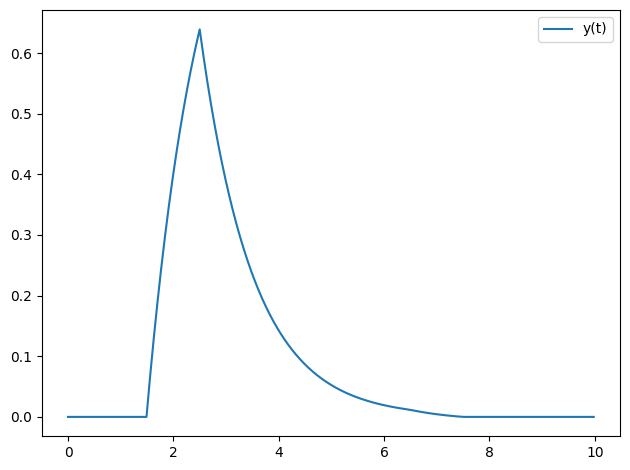

In [4]:
# A COMPLETER
# Calcul de y(t) = x(t)*h(t) et affichage du résultat

t_y, y = convolution(x,h,Te)

plt.figure()
plt.plot(t_y, y, label="y(t)")
plt.legend()
plt.tight_layout()
plt.show()

Bon, et pour finir, effectuez la convolution cette fois avec NumPy. Affichez sur une même figure les deux résultats obtenus.

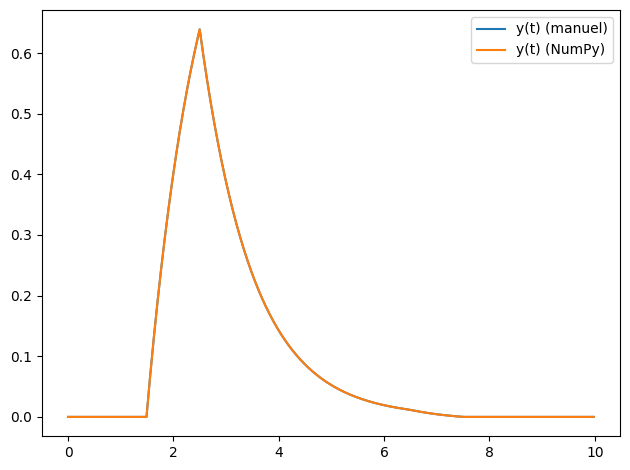

In [5]:
# A COMPLETER
# Calcul de la convolution avec NumPy et affichage des résultats de convolution
y_np = np.convolve(x, h, mode='full') * Te # Il ne faut pas oublier de multiplier par Te

plt.figure()
plt.plot(t_y, y, label="y(t) (manuel)")
plt.plot(t_y, y_np, label="y(t) (NumPy)")
plt.legend()
plt.tight_layout()
plt.show()

Et si tout est bien codé, vous devriez avoir exactement la même courbe. Well done !

## Exercice 2 : J'adore mon signal, je voudrais l'avoir tout le temps !

Pour ce deuxième exercice, on va transformer un signal bref en un signal périodique.

Commencez par créer un signal triangulaire :

\begin{equation*}
    x(t) = \Delta(t) = 1-|t-1|
\end{equation*}

Le signal évoluera entre 0 et 2 secondes, avec une fréquence d'échantillonage de $100 Hz$. Créez et affichez le signal.

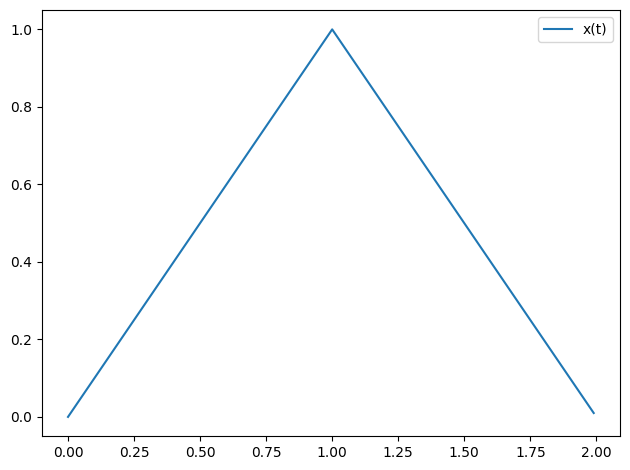

In [6]:
# A COMPLETER
# Création et affichage du signal triangulaire
Fe = 100
Te = 1/Fe
# Axe temporel
t_x = np.arange(0,2,Te)

# Signal triangulaire
x = 1-np.abs(t_x-1)

# Affichage
plt.plot(t_x,x,label="x(t)")
plt.legend()
plt.tight_layout()
plt.show()

L'objectif maintenant va être de rendre ce signal périodique sur une durée de 0 à 10 secondes. Pour cela, on va créer le signal $h(t)$ approprié, tel que $y(t) = x(t) \ast h(t)$ est le même signal que $x(t)$ mais périodique ($T=len(x)$) et évoluant entre 0 et 10 secondes.

**_QUESITON :_** Quel doit être le signal $h(t)$ pour construire le signal $y(t)$ souhaité ?

**_REPONSE :_** Le signal $h(t)$ doit être un peigne de Dirac avec une période $T$ correspondant à la largeur de $x(t)$, soit ici 2 secondes.

Construisez le signal $h(t)$ approprié pour notre tâche et affichez le résultat.

*Note : Au lieu de faire évoluer de 0 à 10 secondes, je vous conseille de faire évoluer de 0 à 10.01 secondes...*

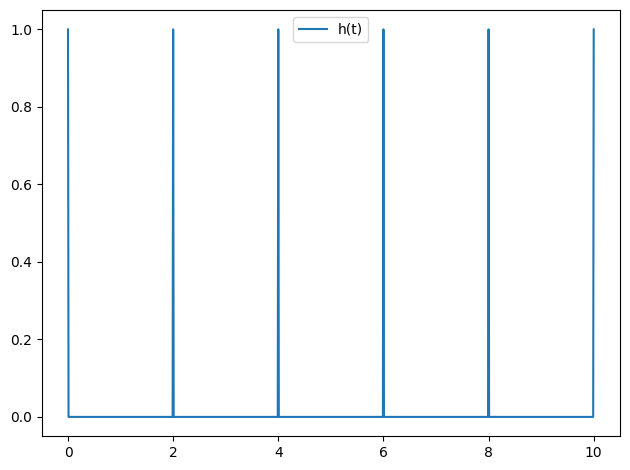

In [7]:
# A COMPLETER
# Création de h(t) et affichage

T = 2

# Axe temporel
t_h = np.arange(0,10.01,Te)

# Signal h(t) peigne de Dirac
h = np.zeros_like(t_h)
h[t_h%T==0] = 1

# Affichage de h(t)
plt.plot(t_h,h,label="h(t)")
plt.legend()
plt.tight_layout()
plt.show()

Appliquez la convolution sur les signaux $x(t)$ et $h(t)$ et affichez le résultat.

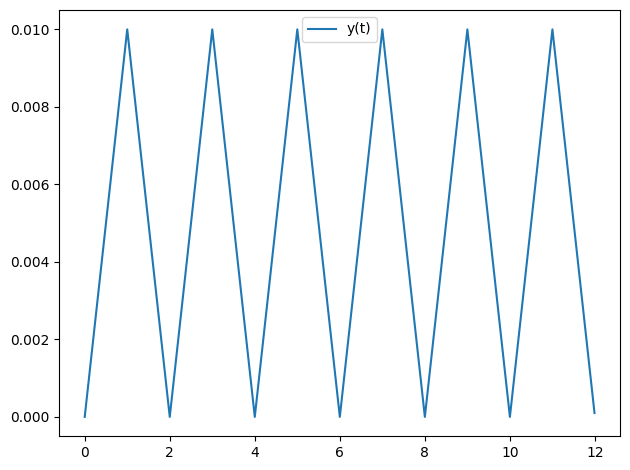

In [8]:
# A COMPLETER
# Convolution entre x(t) et h(t) et affichage du résultat
t_y, y = convolution(x, h, Te)

plt.plot(t_y,y,label="y(t)")
plt.legend()
plt.tight_layout()
plt.show()

**_QUESTION :_** Est-ce que le résultat obtenu est celui attendu ?

*Note : Regardez bien les axes et les valeurs*

**_REPONSE :_** Le signal obtenu ressemble à celui attendu, mais on a un problème d'amplitude (0.01 en maximum au lieu de 1). Il y'a un facteur 100 de différence.

Modifiez $h(t)$ afin de corriger le problème (si vous avez constaté un problème...).

*Note : il y'a une différence entre l'analogique et le numérique. Ici, ça concerne l'échantillonage utilisé...*

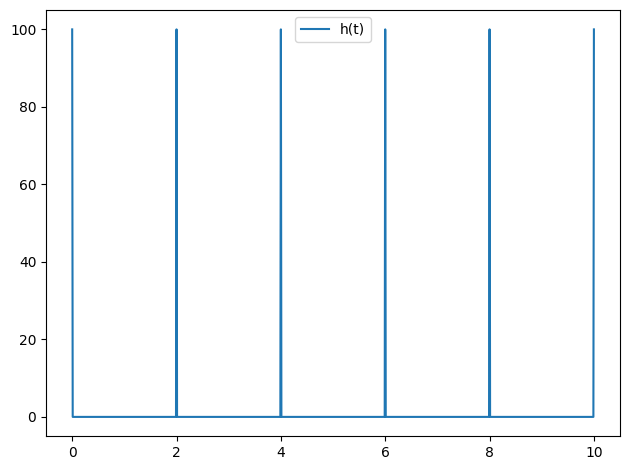

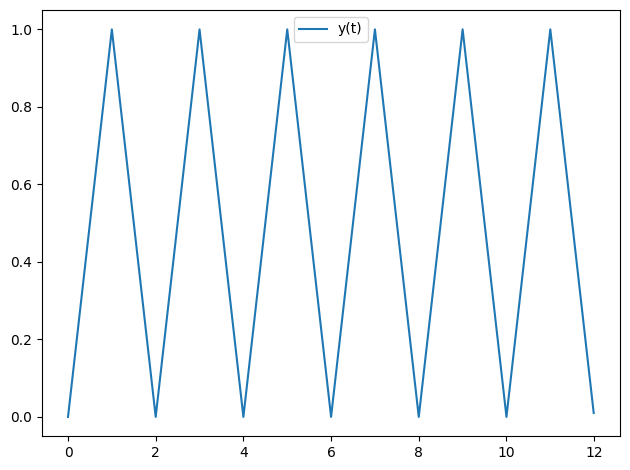

In [9]:
# A COMPLETER
# Modification de h(t) pour corriger y(t)

t_h = np.arange(0,10.01,Te)
h = np.zeros_like(t_h)
h[t_h%T==0] = Fe # Afin de garantir une amplitude correcte en sortie, il faut multiplier le peigne de Dirac par Fe (ou diviser par Te)

plt.plot(t_h,h,label="h(t)")
plt.legend()
plt.tight_layout()
plt.show()

# Convolution entre x(t) et h(t) avec T = 2 secondes
t_y, y = convolution(x, h, Te)

plt.plot(t_y,y,label="y(t)")
plt.legend()
plt.tight_layout()
plt.show()

Modifiez maintenant $h(t)$ en augmentant la période ($T = 3 s$), puis en diminuant la période ($T = 1.5 s$). Effecutez les convolutions entre $x(t)$ et les nouvelles versions de $h(t)$ et affichez les résultats.

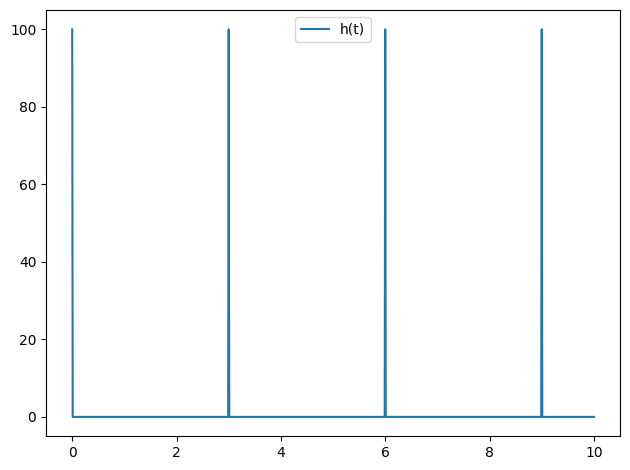

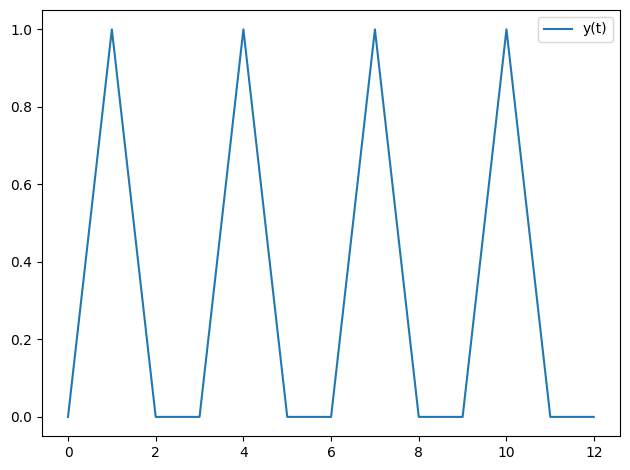

In [10]:
# A COMPLETER
# Modification de h(t) avec T = 3 secondes
T = 3
t_h = np.arange(0,10.01,Te)
h = np.zeros_like(t_h)
h[t_h%T==0] = Fe

plt.figure()
plt.plot(t_h,h,label="h(t)")
plt.legend()
plt.tight_layout()
plt.show()

# Convolution entre x(t) et h(t) avec T = 3 secondes
t_y, y = convolution(x, h, Te)

plt.figure()
plt.plot(t_y,y,label="y(t)")
plt.legend()
plt.tight_layout()
plt.show()

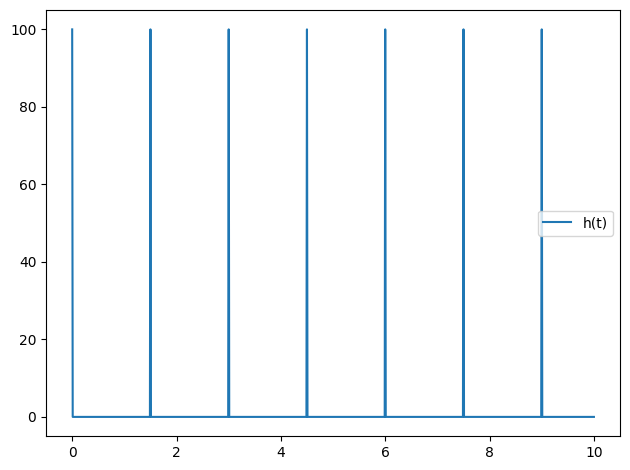

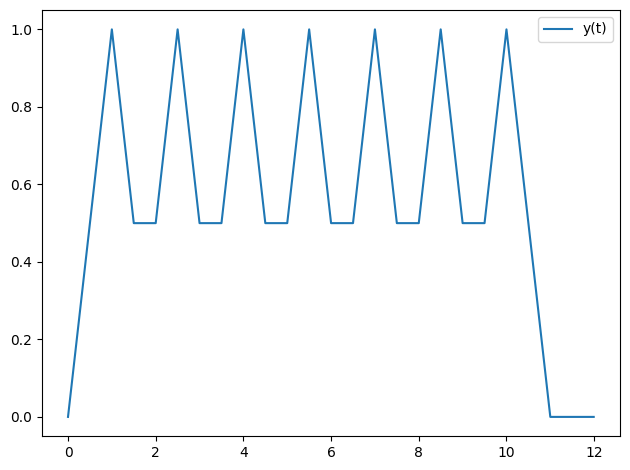

In [11]:
# A COMPLETER
# Modification de h(t) avec T = 1.5 secondes
T = 1.5
t_h = np.arange(0,10.01,Te)
h = np.zeros_like(t_h)
h[t_h%T==0] = Fe

plt.figure()
plt.plot(t_h,h,label="h(t)")
plt.legend()
plt.tight_layout()
plt.show()

# Convolution entre x(t) et h(t) avec T = 1.5 secondes
t_y, y = convolution(x, h, Te)

plt.figure()
plt.plot(t_y,y,label="y(t)")
plt.legend()
plt.tight_layout()
plt.show()

**_QUESTION :_** Est-ce que les produits de convolution sont périodiques ?

**_REPONSE :_**
- Pour $T = 3 s$, le signal issu de la convolution $y(t)$ est bien périodique toutes les 3 secondes.
- Pour $T = 1.5 s$, le signal est théoriquement périodique. Cependant, $h(t)$ n'évolue pas indéfiniement mais dans un intervalle de temps défini. De ce fait, on a des effets de bords qui cassent la périodicité (entre 0 et 0.5 secondes,  puis entre 10.5 et 12 secondes). Entre 0.5 et 10.5 secondes, on retrouve bien un signal périodique en $T = 1.5 s$.

## Exercice 3 : Plancherel ?! J'ai déjà entendu cette théorie...

Pour ce 3ème exercice, construisez les signaux suivants : 
- $x(t) = sin(2 \pi f_0 t)$, avec $f_0 = 2 Hz$.
- $h(t) = sin(2 \pi f_1 t)$, avec $f_1 = 5 Hz$.

Les signaux évolueront entre 0 et 5 secondes, avec une fréquence d'échantillonage de $100 Hz$.

Créez ces deux signaux et affichez les sur 2 figures différentes.

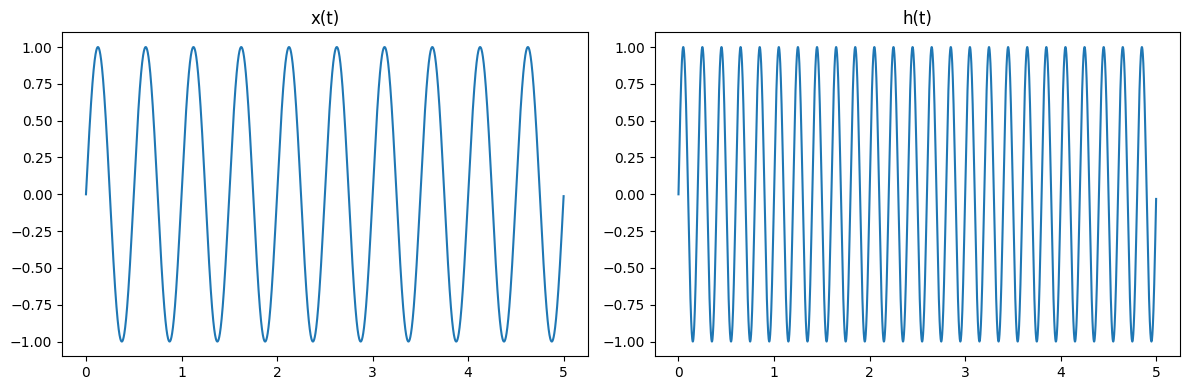

In [12]:
# A COMPLETER
# Création de x(t) et h(t) et affichage des signaux

Fe = 1000
Te = 1/Fe
f0 = 2
f1 = 5

# Création de l'axe temporel
t = np.arange(0,5,Te)

# Création des signaux
x = np.sin(2*np.pi*f0*t)
h = np.sin(2*np.pi*f1*t)

# Affichage des signaux
plt.subplots(1,2,figsize=(12,4))

plt.subplot(121)
plt.plot(t,x)
plt.title("x(t)")

plt.subplot(122)
plt.plot(t,h)
plt.title("h(t)")

plt.tight_layout()
plt.show()

Effectuez la transformée de Fourier réelle sur les deux signaux et affichez les spectres d'amplitudes des deux signaux (sur 2 figures séparées).

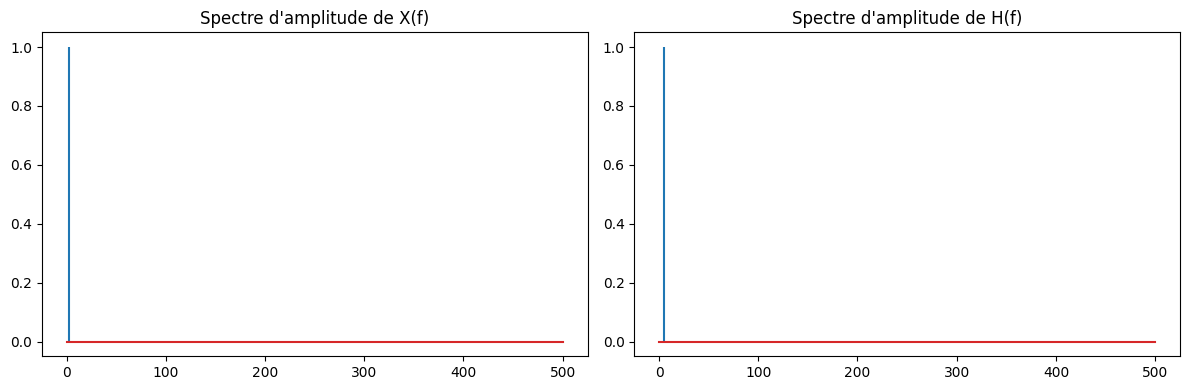

In [13]:
# A COMPLETER
# FFT réelle de x(t) et h(t) et affichage des spectres d'amplitude

# Calcul de la FFT réelle des signaux
N, M = len(x), len(h)
X = np.fft.rfft(x) 
H = np.fft.rfft(h) 

# Calcul des axes fréquentiels des FFT
freq_X = np.fft.rfftfreq(N,Te)
freq_H = np.fft.rfftfreq(M,Te) 

# Récupération des amplitudes de X et H
amplitude_X = np.abs(X) * 2 / N
amplitude_H = np.abs(H) * 2 / M

# Affichage des spectres d'amplitude
plt.subplots(1,2,figsize=(12,4))

plt.subplot(121)
plt.stem(freq_X,amplitude_X, markerfmt=" ")
plt.title("Spectre d'amplitude de X(f)")

plt.subplot(122)
plt.stem(freq_H,amplitude_H, markerfmt=" ")
plt.title("Spectre d'amplitude de H(f)")

plt.tight_layout()
plt.show()

**_QUESTION :_** Que devrait donner théoriquement la convolution entre $x(t)$ et $h(t)$

*Indice : C'est quoi le titre de l'exo ?*

**_REPONSE :_** D'après le théorème de Plancherel :

\begin{equation*}
    x(t) \ast h(t) \leftrightarrow	X(f) . H(f)
\end{equation*}

On voit ici sur les spectres d'amplitude que les deux signaux ont des fréquences différentes ($f_0 = 2 Hz$ et $f_1 = 5 Hz$), sans aucune autre composante d'une autre fréquence. De ce fait, la multiplication de $X(f)$ et $H(f)$ devrait donner un signal sans aucune fréquence, donc un signal plat nul après FFT inverse.

Effectuez la convolution entre $x(t)$ et $h(t)$ et vérifiez que votre hypothèse est bien confirmée.

**ATTENTION : x(t) et h(t) ! Pas X(f) et H(f) !**

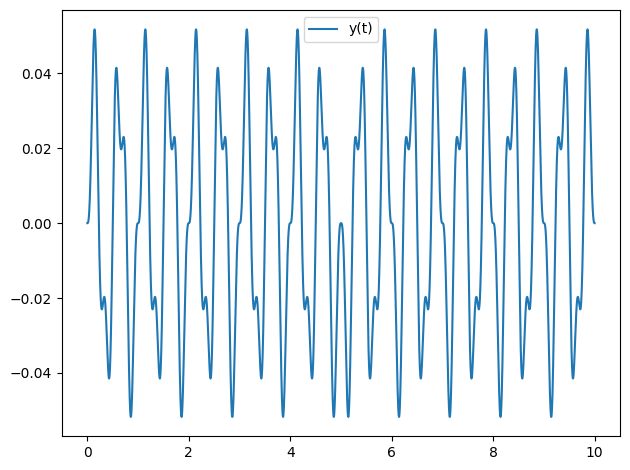

In [14]:
# A COMPLETER
# Convolution entre x(t) et h(t) et affichage du résultat
t_y, y = convolution(x, h, Te)

plt.plot(t_y,y,label="y(t)")
plt.legend()
plt.tight_layout()
plt.show()

**_QUESTION :_** Est-ce que le résultat obtenu est conforme à ce qui était attendu ?

*Note : n'hésitez pas à tracer les signaux $x(t)$ et $y(t)$ sur une même figure pour mieux visualiser si besoin*

**_REPONSE :_** Pas totalement. En théorie, on devrait avoir un signal plat car les deux signaux $x(t)$ et $h(t)$ sont des sinusoïdes pures. Cependant, entre analogique et numérique, il y'a une différence. De ce fait, la convolution entre les deux donne un signal beaucoup plus faible avec une amplitude max de 0.04 contre 1. La forme de $y(t)$ ressemble à une somme de sinusoïdes, sûrement de fréquences $f_0$ et $f_1$.

Pour vérifier le théorème de Plancherel, reproduisez le même signal y(t) obtenu en passant par le produit des FFT. Pour cela :
- Calculez les FFT réelles de $x(t)$ et $h(t)$ (en précisant en paramètre le nombre de bins $n=len(x)+len(h)-1$)
- Calculez $Y(f) = X(f).H(f)$
- Calculez la FFT inverse réelle de $Y(f)$ et divisez le résultat par la fréquence d'échantillonnage $f_e$.

Tracez ensuite les deux signaux sur une même figure pour vérifier que vous obtenez le même résultat.

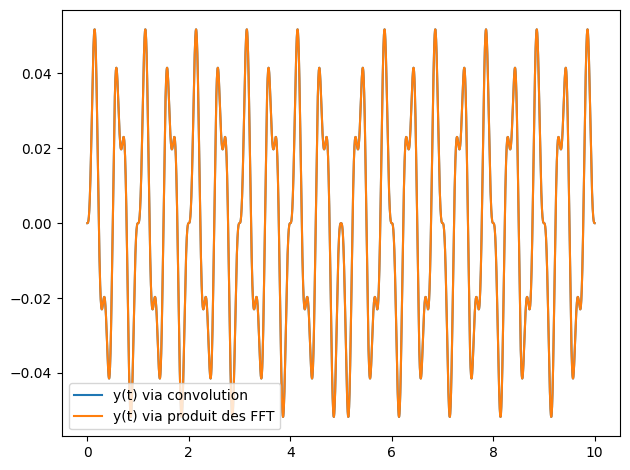

In [15]:
# A COMPLETER
# Vérification du théorème de Plancherel
N, M = len(x), len(h)
L = N + M - 1

# FFT réelles de x et h
X = np.fft.rfft(x, n=L)
H = np.fft.rfft(h, n=L)

# Produit entre X et H
Y = X*H

# FFt réelle inverse de Y
y_freq = np.fft.irfft(Y, n=L) * Te

# Affichage des résultats
plt.plot(t_y,y,label="y(t) via convolution")
plt.plot(t_y,y_freq, label="y(t) via produit des FFT")
plt.legend()
plt.tight_layout()
plt.show()

Normalement, vous obtenez exactement la même courbe que celle faite par convolution.

Répétez les convolutions entre $x(t)$ et $h(t)$ en modifiant $f_1 = 5, 10 , 20 , 50 Hz$ et tracez les signaux $y(t)$ obtenus.

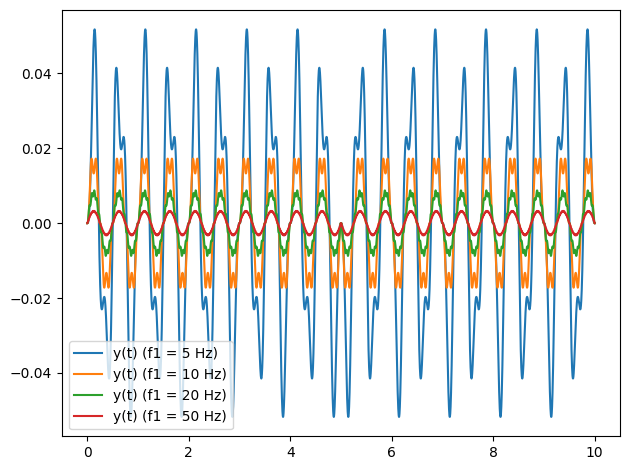

In [16]:
# A COMPLETER
# Convolution entre x(t) et h(t) avec f1 = [5, 10, 20, 50] Hz
f1_valeurs = [5,10,20,50]

for f1 in f1_valeurs:
    h = np.sin(2*np.pi*f1*t)
    t_y, y = convolution(x, h, Te)
    plt.plot(t_y,y,label=f"y(t) (f1 = {f1} Hz)")

plt.legend()
plt.tight_layout()
plt.show()


**_QUESTION :_** Que constatez-vous ? Quelle serait potentiellement l'explication de ces résultats ?

**_REPONSE :_** Plus $f_1$ est grand (et donc $f_1$ éloigné de $f_0$), plus le produit de convolution entre $x(t)$ et $h(t)$ est faible. Cela est dû à une fuite spectrale lors de la convolution. Concrètement, nos signaux sont bornés et non infinis. De ce fait, lorsque la convolution est effectuée, l'intersection entre les deux signaux peuvent comparer deux extraits de signaux avec des périodes non complètes, ce qui explique les résidus. En TF, l'algorithme FFT produit une fuite spectrale, et donc il y'a des amplitudes non nulles autour de $f_0$ et $f_1$. De ce fait, en multipliant les deux TF, on a un résultat non nul.

Lorsque les fréquences $f_0$ et $f_1$ s'éloignent, d'un point de vue de la TF, on a des pics plus éloignés, et donc la fuite spectrale a moins d'impact, ce qui atténue les amplitudes après multiplication.

## Exercice 4 : HEEEEEEE OOOOHHHHH

J'ai trouvé une superbe musique pas très connue, mais je la trouve un peu plate... J'aimerai avoir un peu de reverbe dessus (de l'écho comme dans un grand batîment). Vous pouvez m'aider ?

Chargez le fichier *audio.wav* et tracez le spectre audio.

/tmp/ipykernel_23469/3971863886.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  freq_audio, extrait_audio = wavfile.read("audio.wav")


Fréquence d'échantillonage de l'audio : 44100 Hz


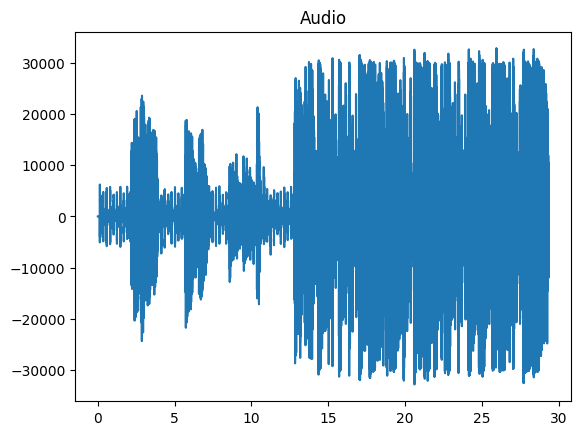

In [17]:
# A COMPLETER
# Chargement de l'extrait audio
from scipy.io import wavfile
freq_audio, extrait_audio = wavfile.read("audio.wav")
print(f"Fréquence d'échantillonage de l'audio : {freq_audio} Hz")

# Reconstruction de l'axe temporel
t_extrait_audio = np.arange(0, len(extrait_audio)/freq_audio, 1/freq_audio)

# Tracé du signal audio
plt.plot(t_extrait_audio, extrait_audio)
plt.title("Audio")
plt.show()

Pour créer de la reverb ici, on va utiliser ce qu'on a fait durant tout le TP : la convolution. Pour cela, on va utiliser une réponse impulsionnelle enregistrée dans un endroit avec de l'écho. Ici, on a le fichier *eglise.wav* qui est une réponse impulsionnelle enregistrée dans une église. Si vous êtes intéressé par d'autres réponses impulsionnelles, je vous conseille ce lien : https://www.openair.hosted.york.ac.uk/?page_id=36

Chargez le fichier audio *eglise.wav* et tracez le spectre audio.

Fréquence d'échantillonage de l'audio : 44100 Hz


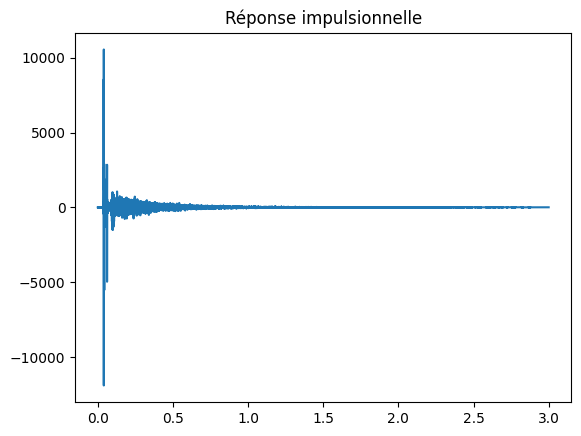

In [18]:
# A COMPLETER
# Chargement de la réponse impulsionnelle
freq_IR, extrait_IR = wavfile.read("eglise.wav")
print(f"Fréquence d'échantillonage de l'audio : {freq_IR} Hz")

# Reconstruction de l'axe temporel
t_extrait_IR = np.arange(0, len(extrait_IR)/freq_IR, 1/freq_IR)

# Tracé de l'IR
plt.plot(t_extrait_IR, extrait_IR)
plt.title("Réponse impulsionnelle")
plt.show()

Avant de faire la convolution, on va convertir nos données, ici typées int16 (entiers codés sur 16 bits). 

Normalisez les données en :
- convertissant les audios en float
- divisant les audios par 32768

In [19]:
# A COMPLETER
# Normalisation de l'extrait audio et de la réponse impulsionnelle
extrait_audio_normalise = extrait_audio.astype(float)/32768.0
extrait_IR_normalise = extrait_IR.astype(float)/32768.0

Calculez maintenant la convolution entre vos deux audios normalisés

**Attention : utilisez np.convolve et ne multipliez pas par $T_e$. Sinon, ça ne marchera pas**

In [20]:
# A COMPLETER
# Convolution de l'extrait audio normalisé et de la réponse impulsionnelle normalisée
extrait_audio_reverb = np.convolve(extrait_audio_normalise, extrait_IR_normalise, mode="full")

Malgré la normalisation des extraits audios, la sortie de convolution peut créer des pics trop forts (ici au-dessus de 1). Corrigez l'audio :
- Détectez s'il y a au moins un pic (en calculant le maximum)
- S'il y'a un pic au-dessus de 1 (ou en-dessous de -1), normalisez l'audio en le divisant par le maximum et en multipliant par 0.999

In [21]:
# A COMPLETER
# Correction de pics trop élevés par normalisation
peak = np.max(np.abs(extrait_audio_reverb))
if peak>0.999:
    extrait_audio_reverb = extrait_audio_reverb/peak*0.999

Convertissez l'audio pour coller à celui d'origine. Pour cela :
- Multipliez l'audio par 32768
- Convertissez l'audio en entier 16 bits

In [22]:
# A COMPLETER
# Conversion de l'audio en entier 16 bits
extrait_audio_reverb = (extrait_audio_reverb*32767.0).astype(np.int16)

Affichez le spectre audio du résultat. 

**Attention : quel est l'axe temporel ? Comment le retrouver ?**

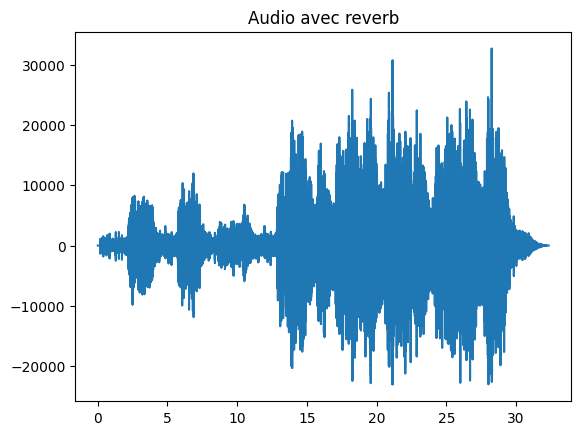

In [23]:
# A COMPLETER
# Affichage du spectre d'audio résultat

# Pour retrouver l'axe temporel, étant donné que notre audio n'a pas changé de fréquences d'échantillonage, il suffit de récupérer la longueur du tableau NumPy de l'audio et de le diviser par la fréquence d'échantillonage
t_audio_reverb = np.arange(0,len(extrait_audio_reverb)/freq_audio,1/freq_audio)
plt.plot(t_audio_reverb, extrait_audio_reverb)
plt.title("Audio avec reverb")
plt.show()

Pour finir, enregistrez l'audio et écoutez le résultat. Alors, qu'est-ce que ça donne ?

In [24]:
# A COMPLETER
# Enregistrement du son final avec reverb
wavfile.write("audio_reverb.wav",freq_audio,(extrait_audio_reverb).astype(np.int16))

---

## La convolution au service de l'art

Ici, juste un bonus, pas de code, mais c'est pour ceux qui sont curieux ;)

Via l'exercice précédent, on a vu comment faire une reverb. Pour cela, on a enregistré une réponse impulsionnelle dans une église, ce qui a permis de créer notre signal reverb. Cependant, on peut aussi créer des réponses impulsionnelles via des objets du quotidien, comme par exemple un jouet à ressort : https://www.openair.hosted.york.ac.uk/?page_id=652

De ce fait, on peut créer des sons très spéciaux, servant d'effet sonore au cinéma par exemple. Ces réponses impulsionnelles peuvent aussi être générées. On peut alors ainsi transformer un son à sa guise, créant ainsi de nouvelles sonorités uniques.

Par exemple, la Loopstation RC-505 est un appareil permettant non seulement de créer des "loops sonores" (c'est-à-dire qu'on enregistre un son et il se répète indéfiniment), mais également de rajouter des effets sonores sur les audios durant l'enregistrement ou a posteriori. La machine a été designée particulèrement pour les artistes vocaux (chant, beatbox). Et tout ça à partir de convolution pour créer des sons originaux.

Un extrait pour finir : 2 artistes beatbox en battle 1v1 qui utilisent la loopstation pour leurs morceaux avec uniquement leurs voix en entrée : https://youtu.be/niZJPoxiv40?si=Uo_hrlOj3iyLechd&t=74